# Data Cleansing and Transformation

## Dependencies

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!tree ../Project_data/

../Project_data/
└── bank-additional
    ├── bank-additional.csv
    ├── bank-additional-full.csv
    └── bank-additional-names.txt

1 directory, 3 files


## Loading Dataset

There are two files but since bank-additional.csv is in bank-additional-full.csv, this file will be ignored.

In [3]:
dataset = pd.read_csv('../Project_data/bank-additional/bank-additional-full.csv', delimiter=';')
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Data Types and Missing values

In [4]:

def get_python_types(dataset):
    # get the Python data types 
    python_types=[]

    for i in dataset:
        for j in dataset[i]:
            python_types.append(str(type(j))[8:-2])
            break

    python_types=pd.Series(python_types,index=dataset.columns)

    return python_types

python_types=get_python_types(dataset)

In [5]:
    
def get_data_types(dataset):
    # Return a dataframe with data types and % of missing values
    pd_types=dataset.dtypes
    record_count=dataset.count()
    missing_values=dataset.isnull().sum()
    p_missing=missing_values/(record_count+missing_values)*100
    keys=['Pandas types','Python types','Number of records','Number of missing values','% of missing values']

    data_types=pd.concat([pd_types,python_types,record_count,missing_values,p_missing],axis=1,keys=keys)

    return data_types

In [6]:
get_data_types(dataset)

,Pandas types,Python types,Number of records,Number of missing values,% of missing values
age,int64,int,41188,0,0.0
job,object,str,41188,0,0.0
marital,object,str,41188,0,0.0
education,object,str,41188,0,0.0
default,object,str,41188,0,0.0
housing,object,str,41188,0,0.0
loan,object,str,41188,0,0.0
contact,object,str,41188,0,0.0
month,object,str,41188,0,0.0
day_of_week,object,str,41188,0,0.0


Missing values were not found in the dataset

## Duplicate values 

In [7]:
# see if there are duplicate values
dataset.duplicated().any()

True

In [8]:
dataset[dataset.duplicated()][['age','job','marital','education','default','housing']]

,age,job,marital,education,default,housing
1266,39,blue-collar,married,basic.6y,no,no
12261,36,retired,married,unknown,no,no
14234,27,technician,single,professional.course,no,no
16956,47,technician,divorced,high.school,no,yes
18465,32,technician,single,professional.course,no,yes
20216,55,services,married,high.school,unknown,no
20534,41,technician,married,professional.course,no,yes
25217,39,admin.,married,university.degree,no,no
28477,24,services,single,high.school,no,yes
32516,35,admin.,married,university.degree,no,yes


## Outliers

### Approaches to dealing with outliers
* Visualizations and descriptive statistics to detect potential outliers
* Filtering by fixed threshold
* Clipping the attribute at a computed percentile ( 99%)
* log of every value
* IQR Score






### Visualizations and descriptive statistics to detect potential outliers

In [9]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


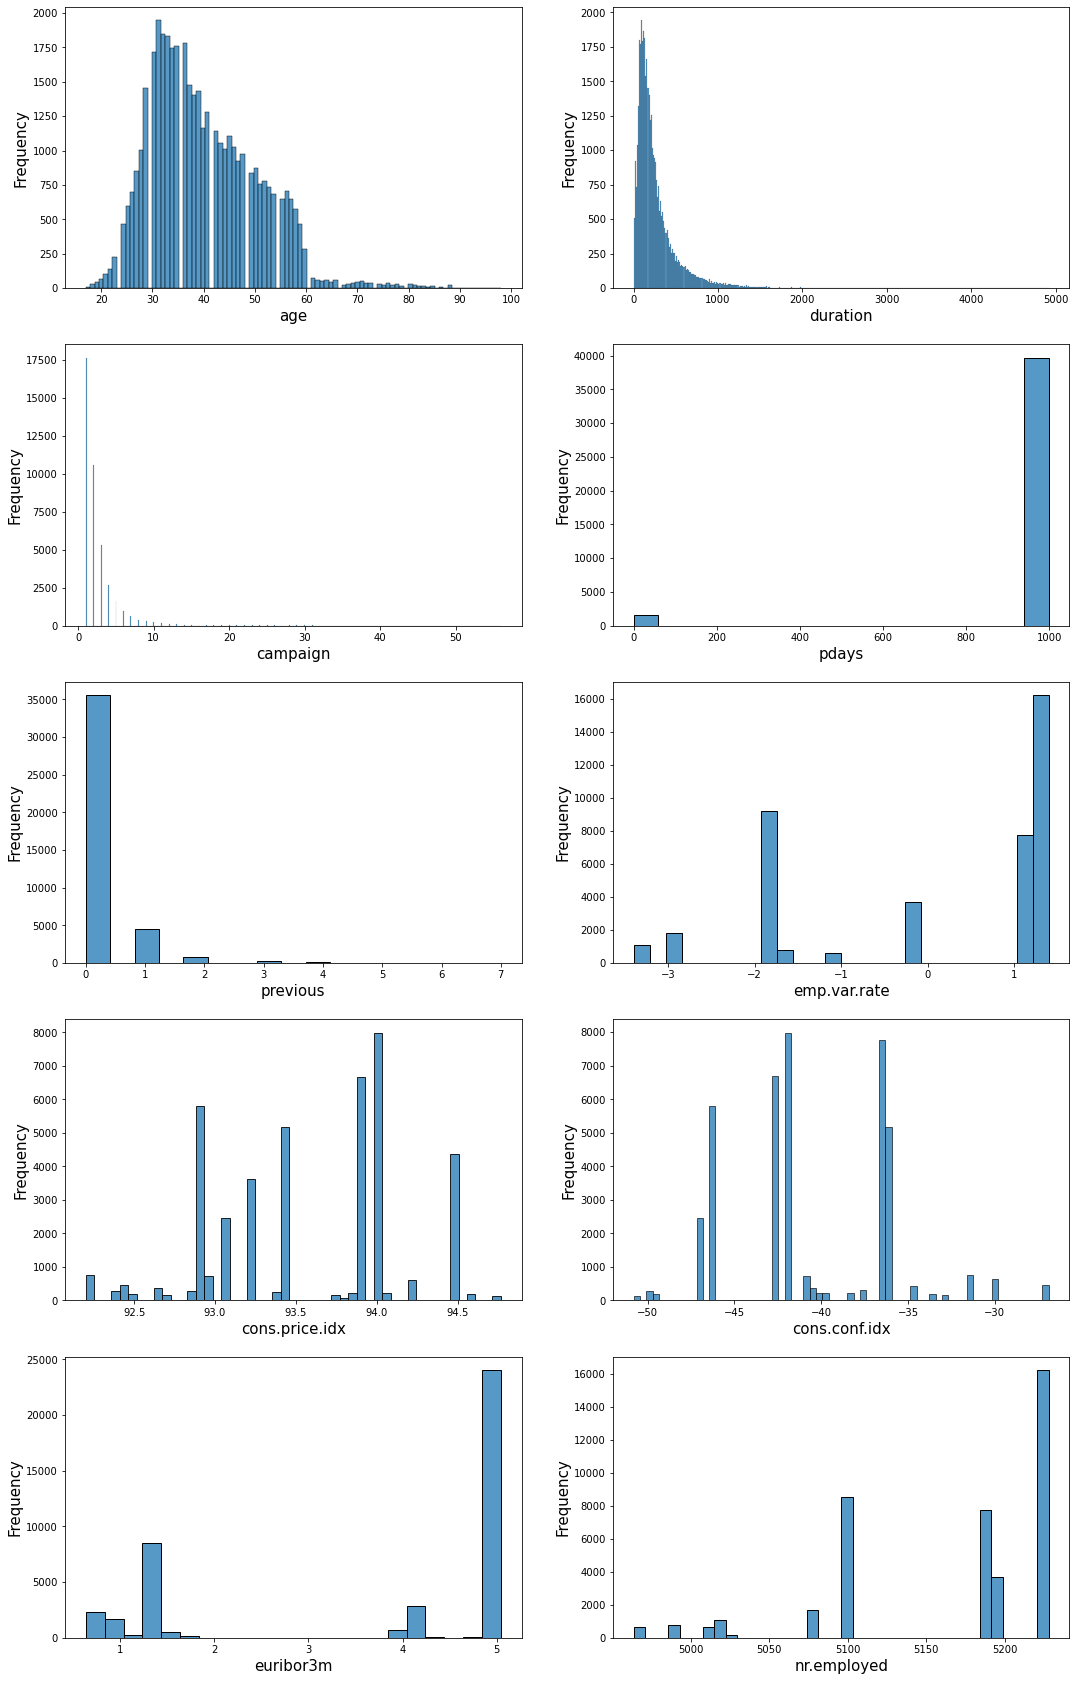

In [10]:


numerical_att=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

def plot_histogram(dataset,attribute,ax):
    #ax.hist(dataset[attribute],bins=50)
    sns.histplot(data=dataset,x=attribute,ax=ax)
    ax.set_xlabel(attribute,fontsize=15)
    ax.set_ylabel('Frequency',fontsize=15)
    

fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10))=plt.subplots(5,2,figsize=(18,30))
axes=fig.get_axes()

for i,att in enumerate(numerical_att):
    plot_histogram(dataset,att,axes[i])

Potential outliers in age, duration and campaign

In [11]:
potential_outliers = ["age", "duration", "campaign"]

### Filtering by fixed threshold: 
* There is not any attribute in which to apply this approach is reasonable. 
* The **age** attribute has a maximum value of 98 and this value is correct.

### Clipping the attribute at a computed percentile

In [12]:
# Calculate percentile 0.99 for age, duration and campaign
max_threshold = dataset[potential_outliers].quantile(0.99)
max_threshold

age           71.00
duration    1271.13
campaign      14.00
Name: 0.99, dtype: float64

In [13]:
(dataset[potential_outliers] < max_threshold).sum()

age         40766
duration    40776
campaign    40713
dtype: int64

In [14]:
dataset = dataset[~((dataset[potential_outliers] < max_threshold).sum(axis=1) != 3)]
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


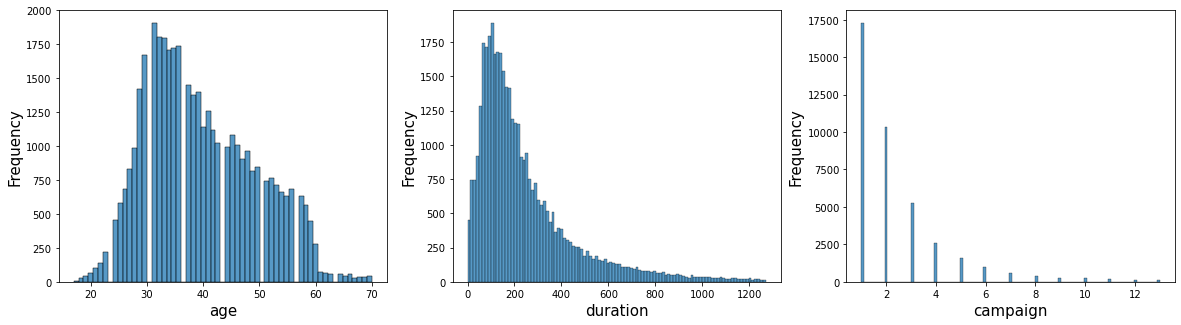

In [15]:


def plot_histogram(dataset,attribute,ax):
    #ax.hist(dataset[attribute],bins=50)
    sns.histplot(data=dataset,x=attribute,ax=ax)
    ax.set_xlabel(attribute,fontsize=15)
    ax.set_ylabel('Frequency',fontsize=15)
    

fig,((ax1,ax2,ax3))=plt.subplots(1,3,figsize=(20,5))
axes=fig.get_axes()

for i,att in enumerate(potential_outliers):
    plot_histogram(dataset,att,axes[i])

Better, but still some large outlier values in **duration** and **campaign**

### Log of every value

In [16]:
def log_scal(x):
    return np.log(x+1)

In [17]:
dataset.loc[:,'duration' ] = dataset['duration'].apply(log_scal)

/home/samuelcueva/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [18]:
dataset['duration'].describe()

count    39883.000000
mean         5.161835
std          0.881941
min          0.000000
25%          4.644391
50%          5.192957
75%          5.752573
max          7.148346
Name: duration, dtype: float64

In [19]:
dataset.loc[:,'campaign' ] = dataset['campaign'].apply(log_scal)

In [20]:
dataset['campaign'].describe() 

count    39883.000000
mean         1.097622
std          0.449643
min          0.693147
25%          0.693147
50%          1.098612
75%          1.386294
max          2.639057
Name: campaign, dtype: float64

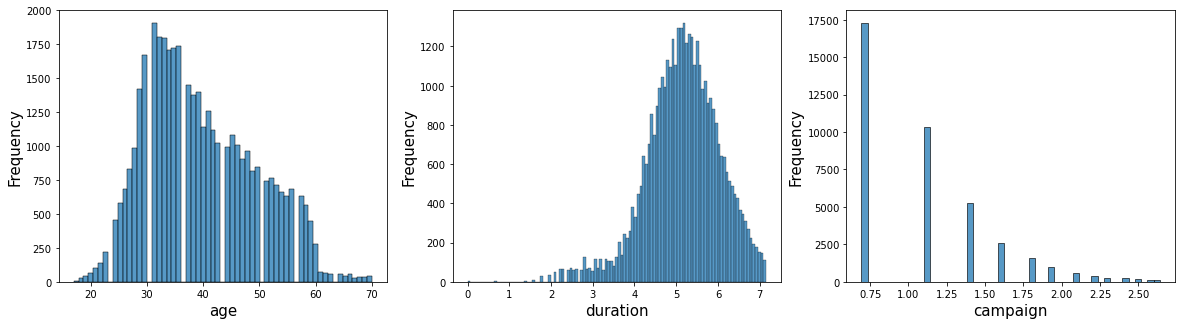

In [21]:

def plot_histogram(dataset,attribute,ax):
    #ax.hist(dataset[attribute],bins=50)
    sns.histplot(data=dataset,x=attribute,ax=ax)
    ax.set_xlabel(attribute,fontsize=15)
    ax.set_ylabel('Frequency',fontsize=15)
    

fig,((ax1,ax2,ax3))=plt.subplots(1,3,figsize=(20,5))
axes=fig.get_axes()

for i,att in enumerate(potential_outliers):
    plot_histogram(dataset,att,axes[i])

Now, **duration** looks more normal and **campaign** has less tail

### IQR Score

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or “far outs” when described in the context of box and whisker plots.

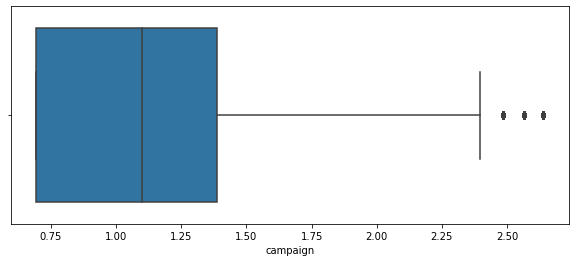

In [22]:
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x="campaign",data=dataset, linewidth=1.5 )
plt.show()

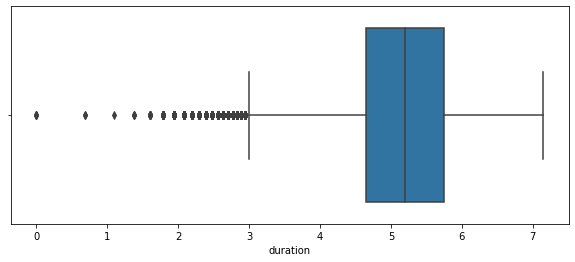

In [23]:
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x="duration",data=dataset, linewidth=1.5 )
plt.show()


As you can see from the box-and-whisker plots, there are still outliers in the attributes

In [24]:
def quantile_statistics(att):
    Q1=att.quantile(0.25)
    Q3=att.quantile(0.75)
    
    # interquartile range 
    IQR=Q3-Q1
   
    return IQR,Q1,Q3

In [25]:

# calculate quantile statistics 
IQR_campaign,Q1_campaign,Q3_campaign=quantile_statistics(dataset['campaign'])
IQR_duration,Q1_duration,Q3_duration=quantile_statistics(dataset['duration'])


# calculate the whiskers 
lower_whisker_campaign=Q1_campaign - 1.5 * IQR_campaign
top_whisker_campaign=Q3_campaign + 1.5 * IQR_campaign

lower_whisker_duration=Q1_duration - 1.5 * IQR_duration
top_whisker_duration=Q3_duration + 1.5 * IQR_duration


# find outliers
outliers_location_campaign=(dataset['campaign'] < lower_whisker_campaign )\
                                 |(dataset['campaign'] > top_whisker_campaign )

outliers_location_duration=(dataset['duration'] < lower_whisker_duration )\
                                 |(dataset['duration'] > top_whisker_duration )

In [26]:
dataset = dataset[~outliers_location_campaign & ~outliers_location_duration] 

In [27]:
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.693147,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.693147,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0.693147,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.693147,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0.693147,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,0.693147,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,0.693147,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0.693147,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,1.098612,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


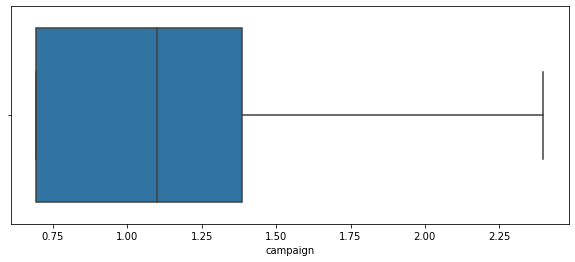

In [28]:
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x="campaign",data=dataset, linewidth=1.5 )
plt.show()

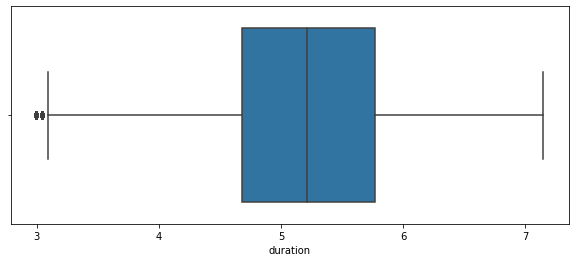

In [29]:
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x="duration",data=dataset, linewidth=1.5 )
plt.show()

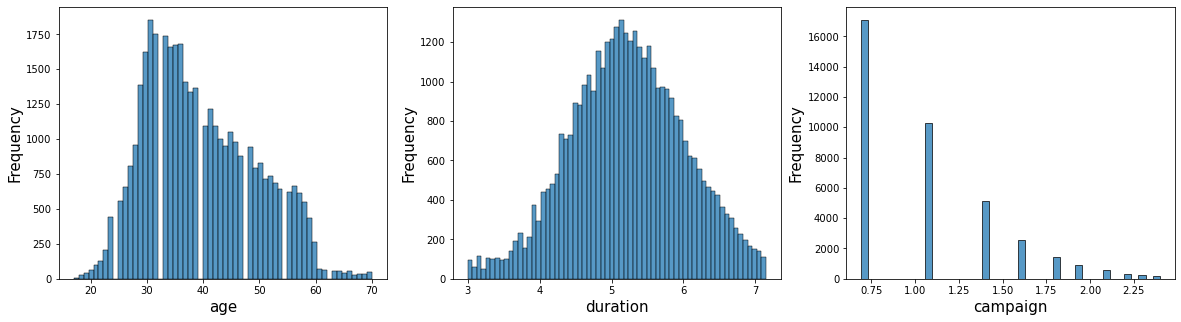

In [30]:

def plot_histogram(dataset,attribute,ax):
    #ax.hist(dataset[attribute],bins=50)
    sns.histplot(data=dataset,x=attribute,ax=ax)
    ax.set_xlabel(attribute,fontsize=15)
    ax.set_ylabel('Frequency',fontsize=15)
    

fig,((ax1,ax2,ax3))=plt.subplots(1,3,figsize=(20,5))
axes=fig.get_axes()

for i,att in enumerate(potential_outliers):
    plot_histogram(dataset,att,axes[i])

Now, our data is more useful than the original data